In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
bjkMac = pd.read_excel("besiktas_mac.xlsx")
bjkFrame = pd.DataFrame(bjkMac)
bjkFrame = bjkFrame.drop(["Maç"],axis=1) #iki tarafın da 21 maçlık istatistiksel verileri toplandı

In [37]:
bjkFrame.describe()

,BJK Score,BJK Conceded,BJK Shot on Target,BJK Accurate Pass,BJK Poss,BJK xG,BJK Opp Rating,ATH Score,ATH Conceded,ATH Shot on Target,ATH Accurate Pass,ATH Poss,ATH xG,ATH Opp Rating
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.190476,1.428571,4.571429,394.333333,56.095238,1.581905,6.887619,1.714286,0.666667,4.571429,354.666667,49.380952,1.433810,6.861429
std,0.749603,1.325573,2.521338,64.560308,6.854960,0.684424,0.104399,0.902378,0.577350,2.181088,91.346775,11.002164,0.847334,0.106362
min,0.000000,0.000000,0.000000,312.000000,41.000000,0.440000,6.710000,0.000000,0.000000,1.000000,228.000000,32.000000,0.170000,6.740000
25%,1.000000,0.000000,3.000000,344.000000,53.000000,1.120000,6.790000,1.000000,0.000000,3.000000,287.000000,40.000000,1.020000,6.790000
50%,1.000000,1.000000,5.000000,384.000000,56.000000,1.600000,6.880000,2.000000,1.000000,4.000000,346.000000,48.000000,1.320000,6.840000
75%,2.000000,2.000000,5.000000,443.000000,61.000000,2.020000,6.970000,2.000000,1.000000,6.000000,403.000000,57.000000,1.660000,6.870000
max,3.000000,4.000000,11.000000,510.000000,66.000000,3.050000,7.060000,4.000000,2.000000,8.000000,579.000000,70.000000,4.010000,7.150000


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y = bjkFrame[["BJK Score","BJK Conceded","ATH Score","ATH Conceded"]].values
x = bjkFrame.drop(["BJK Opp","ATH Opp"],axis=1).values #almaması gereken verileri çıkarttık

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [43]:
model = Sequential()
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(20,activation="relu"))


model.add(Dense(4))

model.compile(optimizer="adam",loss="mse")
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 3.2155
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 3.1666
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 3.1210
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 3.0782
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 3.0385
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 3.0017
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 2.9673
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 2.9346
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 2.9035
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 2.8741
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 2.8456
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.8182
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2.7918
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 2.7675
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 2.7442
Epoch 16/200
1/1 ━━

In [44]:
kayipVeri = pd.DataFrame(model.history.history)

<Axes: >

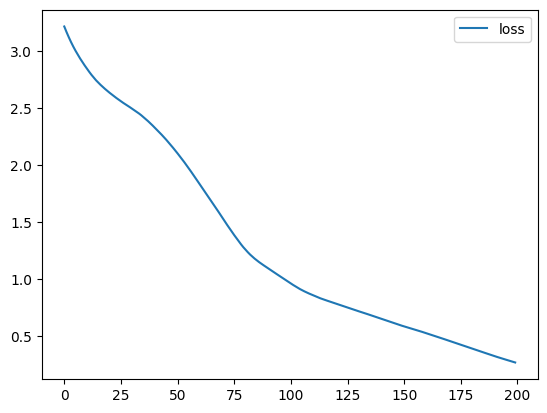

In [45]:
kayipVeri.plot()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
predArray = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [48]:
predArray

array([[0.9845197 , 2.2143521 , 1.4328266 , 0.7051674 ],
       [2.0760155 , 1.3742788 , 2.1408567 , 0.8421845 ],
       [1.2568189 , 1.8065008 , 1.53703   , 0.64954734],
       [1.5242659 , 2.6415172 , 1.6131767 , 0.23942356],
       [1.8123868 , 1.8057158 , 2.031251  , 0.49068552],
       [1.7072011 , 1.2612224 , 1.8696002 , 0.7599571 ],
       [1.5957217 , 1.3074476 , 1.8861208 , 1.0490159 ]], dtype=float32)

In [49]:
bjkAvgRating = 6.92 #sofascore verisi baz alındı
bilbaoAvgRating = 7.04
agirlik = 1 - (bjkAvgRating/bilbaoAvgRating)

In [50]:
i=0
while (i<4):
    j=1
    while(j<3):
        predArray[i][j] = predArray[i][j]*(1+agirlik)
        j = j+1
    i=i+1

In [51]:
predDf = pd.DataFrame(predArray)
predDf.iloc[:5]

,0,1,2,3
0,0.984520,2.252097,1.457250,0.705167
1,2.076015,1.397704,2.177349,0.842184
2,1.256819,1.837293,1.563229,0.649547
3,1.524266,2.686543,1.640674,0.239424
4,1.812387,1.805716,2.031251,0.490686
